In [190]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
import pandas as pd
import numpy as np
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import compute_all_derived_metrics
import matplotlib.pyplot as plt

In [192]:
#path = f"/home/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/DFallpa_Diego_230929_RULE_BASE_stroke.pkl"
animal = "Diego"
date = "230629"

In [193]:
list_list_coefs = {}

In [194]:
models = []

In [195]:
for twind in [(-0.2, 0), (0, 0.2)]:
    path = f"/tmp/{animal}_{date}/euclidian_240506/RESULTS/{twind}/DFRES_{twind}.pkl"
    DFRES = pd.read_pickle(path)
    DFRES['twind_analy'] = DFRES['twind']
    DFRES['var_var_others'] = DFRES['var'].astype(str) + DFRES['var_others'].astype(str)

    DFRES_ORIG, DFRES_PIVOT_DISTR, DFRES_PIVOT_PAIRWISE, DFRES_PIVOT_YUE, plot_params = compute_all_derived_metrics(DFRES)

    models = DFRES_ORIG['var_var_others'].unique()
    list_coefs = {}
    for m in models:
        coefs = {}
        print(m)
        DFRES_t = DFRES_ORIG[DFRES_ORIG['var_var_others']==m]
        bregions = DFRES_t['bregion'].unique()
        for b in bregions:
            DFRES_tt = DFRES_t[(DFRES_t['bregion']==b) & (DFRES_t['dat_level']=='pts_yue_diff') & (DFRES_t['shuffled']==False) & (DFRES_t['effect_context']=='diff|same')]
            coefs[b] = np.mean(DFRES_tt['dist_norm_95'])
        list_coefs[m] = coefs
    list_list_coefs[str(twind)] = list_coefs

00|shape-fixation|('shape-macrosaccade-index', 'loc-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')
01|shape-fixation|('shape-macrosaccade-index', 'loc-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')
02|shape-fixation|('shape-macrosaccade-index', 'loc-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')
03|loc-fixation|('shape-macrosaccade-index', 'shape-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')
04|loc-fixation|('shape-macrosaccade-index', 'shape-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')
05|loc-fixation|('shape-macrosaccade-index', 'shape-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')
06|seqc_0_shape|('shape-macrosaccade-index', 'seqc_0_loc', 'shape-fixation', 'loc-fixation', 'task_kind')
07|seqc_0_shape|('shape-macrosaccade-index', 'seqc_0_loc', 'shape-fixation', 'loc-fixation', 'task_kind')
08|seqc_0_shape|('shape-macrosaccade-index', 'seqc_0_loc', 'shape-fixation', 'loc-fixation', 'task_kind')
09|is-fixated-on-seqc0shape|('shape-macrosacca

In [197]:
DFRES_tt

,var,var_others,effect_samediff,context_samediff,leveff,levo,dist,dat_level,shuffled,shuffled_iter,...,bregion,twind,event,dist_norm_95,index_var_str,var_var_others,effect_context,animal,date,done_compute_normalized_distances
43909,is-fixated-on-seqc0shape,"(shape-macrosaccade-index, shape-fixation, seq...",diff,same,ALL,"(4.0, arcdeep-4-3-0, (1, 0), prims_on_grid)",0.049318,pts_yue_diff,False,-1,...,preSMA_a,"(-0.4, 0.4)",fixon_preparation,0.011582,16,16|is-fixated-on-seqc0shape|('shape-macrosacca...,diff|same,dummy,-1,True
43952,is-fixated-on-seqc0shape,"(shape-macrosaccade-index, shape-fixation, seq...",diff,same,ALL,"(3.0, V-2-2-0, (1, 1), prims_on_grid)",-0.052301,pts_yue_diff,False,-1,...,preSMA_a,"(-0.4, 0.4)",fixon_preparation,-0.012282,16,16|is-fixated-on-seqc0shape|('shape-macrosacca...,diff|same,dummy,-1,True
43954,is-fixated-on-seqc0shape,"(shape-macrosaccade-index, shape-fixation, seq...",diff,same,ALL,"(3.0, V-2-2-0, (1, 0), prims_on_grid)",0.048754,pts_yue_diff,False,-1,...,preSMA_a,"(-0.4, 0.4)",fixon_preparation,0.011449,16,16|is-fixated-on-seqc0shape|('shape-macrosacca...,diff|same,dummy,-1,True
43958,is-fixated-on-seqc0shape,"(shape-macrosaccade-index, shape-fixation, seq...",diff,same,ALL,"(3.0, line-8-1-0, (1, 0), prims_on_grid)",-0.028718,pts_yue_diff,False,-1,...,preSMA_a,"(-0.4, 0.4)",fixon_preparation,-0.006744,16,16|is-fixated-on-seqc0shape|('shape-macrosacca...,diff|same,dummy,-1,True
43960,is-fixated-on-seqc0shape,"(shape-macrosaccade-index, shape-fixation, seq...",diff,same,ALL,"(3.0, arcdeep-4-3-0, (1, 0), prims_on_grid)",0.056642,pts_yue_diff,False,-1,...,preSMA_a,"(-0.4, 0.4)",fixon_preparation,0.013302,16,16|is-fixated-on-seqc0shape|('shape-macrosacca...,diff|same,dummy,-1,True
43994,is-fixated-on-seqc0shape,"(shape-macrosaccade-index, shape-fixation, seq...",diff,same,ALL,"(5.0, zigzagSq-1-1-1, (1, 0), prims_on_grid)",-0.046791,pts_yue_diff,False,-1,...,preSMA_a,"(-0.4, 0.4)",fixon_preparation,-0.010988,16,16|is-fixated-on-seqc0shape|('shape-macrosacca...,diff|same,dummy,-1,True
44015,is-fixated-on-seqc0shape,"(shape-macrosaccade-index, shape-fixation, seq...",diff,same,ALL,"(4.0, line-8-1-0, (1, 0), prims_on_grid)",-0.020757,pts_yue_diff,False,-1,...,preSMA_a,"(-0.4, 0.4)",fixon_preparation,-0.004875,16,16|is-fixated-on-seqc0shape|('shape-macrosacca...,diff|same,dummy,-1,True
44025,is-fixated-on-seqc0shape,"(shape-macrosaccade-index, shape-fixation, seq...",diff,same,ALL,"(5.0, arcdeep-4-3-0, (1, 0), prims_on_grid)",-0.116819,pts_yue_diff,False,-1,...,preSMA_a,"(-0.4, 0.4)",fixon_preparation,-0.027433,16,16|is-fixated-on-seqc0shape|('shape-macrosacca...,diff|same,dummy,-1,True
44043,is-fixated-on-seqc0shape,"(shape-macrosaccade-index, shape-fixation, seq...",diff,same,ALL,"(4.0, zigzagSq-1-1-1, (1, 0), prims_on_grid)",-0.035677,pts_yue_diff,False,-1,...,preSMA_a,"(-0.4, 0.4)",fixon_preparation,-0.008378,16,16|is-fixated-on-seqc0shape|('shape-macrosacca...,diff|same,dummy,-1,True
44055,is-fixated-on-seqc0shape,"(shape-macrosaccade-index, shape-fixation, seq...",diff,same,ALL,"(3.0, zigzagSq-1-1-1, (1, 0), prims_on_grid)",0.154317,pts_yue_diff,False,-1,...,preSMA_a,"(-0.4, 0.4)",fixon_preparation,0.036239,16,16|is-fixated-on-seqc0shape|('shape-macrosacca...,diff|same,dummy,-1,True


In [198]:
DFRES_tt.columns

Index(['var', 'var_others', 'effect_samediff', 'context_samediff', 'leveff',
       'levo', 'dist', 'dat_level', 'shuffled', 'shuffled_iter', 'index_var',
       'DIST_NULL_50', 'DIST_NULL_95', 'DIST_NULL_98', 'twind_analy',
       'bregion', 'twind', 'event', 'dist_norm_95', 'index_var_str',
       'var_var_others', 'effect_context', 'animal', 'date',
       'done_compute_normalized_distances'],
      dtype='object')

In [199]:
list_list_coefs

{'(-0.2, 0)': {"00|shape-fixation|('shape-macrosaccade-index', 'loc-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')": {'M1_m': -0.0018642010127515208,
   'M1_l': 0.020360418787383486,
   'PMv_l': -0.009410330218242995,
   'PMv_m': 0.002168707968532227,
   'PMd_p': 0.002776412522910685,
   'PMd_a': 0.029180048462502755,
   'dlPFC_a': 0.015667025348113615,
   'vlPFC_p': -0.005576915089839236,
   'vlPFC_a': -0.006203897620536922,
   'FP_p': -0.007764274621739938,
   'FP_a': -0.0171673238384933,
   'SMA_p': 0.017334826156808487,
   'SMA_a': 0.0005985821376662054,
   'preSMA_p': -0.008804188270813116,
   'preSMA_a': 0.019363656648329324},
  "01|shape-fixation|('shape-macrosaccade-index', 'loc-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')": {'M1_m': -0.002990823091189621,
   'M1_l': 0.027008736034367934,
   'PMv_l': -0.008518716940088697,
   'PMv_m': 0.008005918972286566,
   'PMd_p': 0.012877237341181506,
   'PMd_a': 0.031004294245948905,
   'dlPFC_a': 0.014008617172878178,
   

In [196]:
models

array(["00|shape-fixation|('shape-macrosaccade-index', 'loc-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')",
       "01|shape-fixation|('shape-macrosaccade-index', 'loc-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')",
       "02|shape-fixation|('shape-macrosaccade-index', 'loc-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')",
       "03|loc-fixation|('shape-macrosaccade-index', 'shape-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')",
       "04|loc-fixation|('shape-macrosaccade-index', 'shape-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')",
       "05|loc-fixation|('shape-macrosaccade-index', 'shape-fixation', 'seqc_0_shape', 'seqc_0_loc', 'task_kind')",
       "06|seqc_0_shape|('shape-macrosaccade-index', 'seqc_0_loc', 'shape-fixation', 'loc-fixation', 'task_kind')",
       "07|seqc_0_shape|('shape-macrosaccade-index', 'seqc_0_loc', 'shape-fixation', 'loc-fixation', 'task_kind')",
       "08|seqc_0_shape|('shape-macrosaccade-index', 'seqc_0_loc', 'shap

In [200]:
twind_pre = "(-0.2, 0)"
twind_post = "(0, 0.2)"

In [188]:
%matplotlib inline

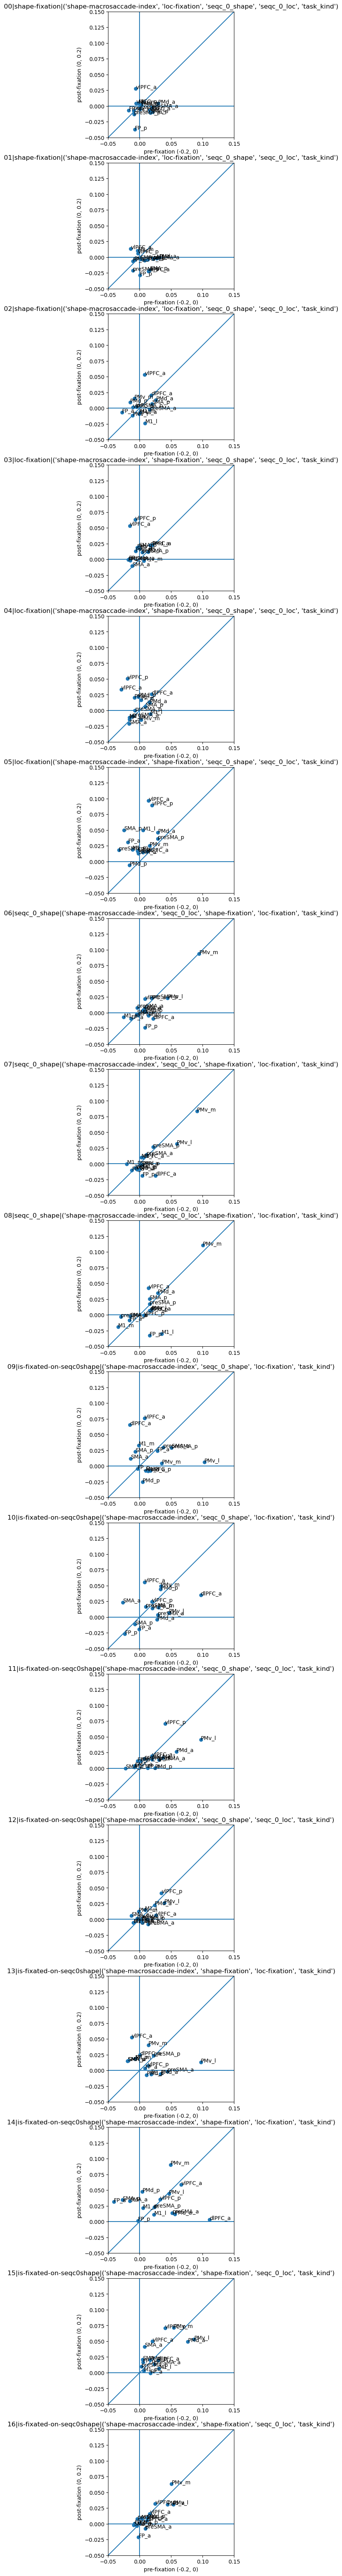

In [206]:
fig, axes = plt.subplots(len(models), 1, squeeze=False, figsize=(10, 5*len(models)))
for i, m in enumerate(models):
    ax = axes[i,0]
    ax.set_xlim([-0.05, 0.15])
    ax.set_ylim([-0.05, 0.15])
    ax.set_box_aspect(1)

    x = list(list_list_coefs[twind_pre][m].values())
    y = list(list_list_coefs[twind_post][m].values())
    n = list(list_list_coefs[twind_pre][m].keys())

    ax.scatter(x, y)
    ax.plot([-0.1, 0.3], [-0.1, 0.3])
    ax.axhline(0)
    ax.axvline(0)
    ax.set_xlabel("pre-fixation (-0.2, 0)")
    ax.set_ylabel("post-fixation (0, 0.2)")
    ax.set_title(m)

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))